**сеть Хемминга**

Евгений Борисов <esborisov@sevsu.ru>

---

## библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import imageio
import pickle
import gzip

In [2]:
def plot_images(A,figsize=(10,4)):
    f, axarr = plt.subplots(1,len(A), sharey=False, sharex=False, figsize=figsize)
    for i in range(len(A)): 
        axarr[i].axis('off')
        axarr[i].imshow(A[i])

##  загружаем данные 

In [3]:
with gzip.open('../data/pix/30x30-123.pkl.gz','rb') as f: data = pickle.load(f)

    # with gzip.open('data/pix/30x30-abc/data.pkl.gz','rb') as f: data = pickle.load(f)
# with gzip.open('data/pix/17x31/data.pkl.gz','rb') as f: data = pickle.load(f)
# with gzip.open('data/pix/17x31-123/data.pkl.gz','rb') as f: data = pickle.load(f)

In [4]:
ideal = data[0]
test = data[1:]
#n_test = len(data)-1

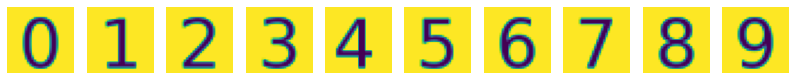

In [5]:
# учебный набор 
plot_images(ideal,figsize=(14,4))

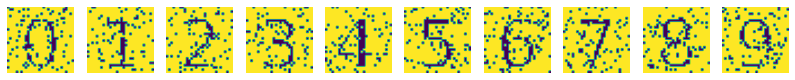

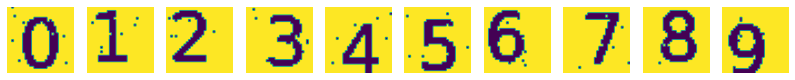

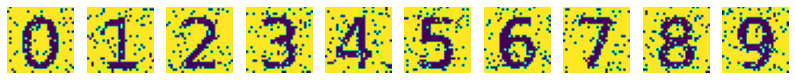

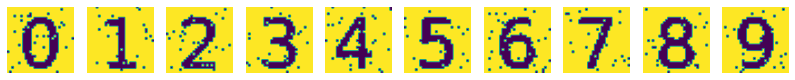

In [6]:
# примеры для теста
for i in range(len(test)): plot_images(test[i],figsize=(14,4))

In [7]:
im_size = ideal[0].shape
im_size

(30, 30)

## загружаем память сети

![boltzman](http://mechanoid.su/content/neural-net-hamming-classifier.html/nnet.png)

In [8]:
# масштабруем в [-1,+1]
X_train = np.vstack([ (m.flatten()>0)*2-1 for m in ideal ])

In [9]:
W1 = (0.5*X_train).T # веса для нейронов первого слоя

m = X_train.shape[0] # количество учебных примеров 
c=1.0/(2.0*m) # коэффициент торможения

W2 = -(np.ones(m)-np.eye(m))*c+np.eye(m) # веса для нейронов второго слоя

In [10]:
def run(x,W1,W2,max_iter=50):
    o = x.dot(W1)
    for i in range(max_iter):
        o_prev=o.copy() # сохраняем состояние
        o = np.max( [ o.dot(W2), np.zeros(m) ], axis=0 ) # переходим в новое состояние
        # если состояние не изменилось то завершаем
        if np.all(o==o_prev): break
    # print(i)  
    return o        

## тестируем

In [11]:
def make_test(tt,figsize=(20,2)):
    # масштабруем в [-1,+1]
    X_test = np.vstack([(m.flatten()>0)*2-1 for m in tt])

    # выполняем для всех тестовых примеров
    out = [ np.argmax(run(X_test[i,:],W1,W2)) for i in range(X_test.shape[0]) ]

    f,axarr = plt.subplots(2,len(tt),sharey=False,sharex=False,figsize=figsize)
    for i in range(len(tt)):
        axarr[0,i].imshow( tt[i] )
        axarr[0,i].axis('off')
        axarr[1,i].imshow( ideal[out[i]])
        axarr[1,i].axis('off')


---

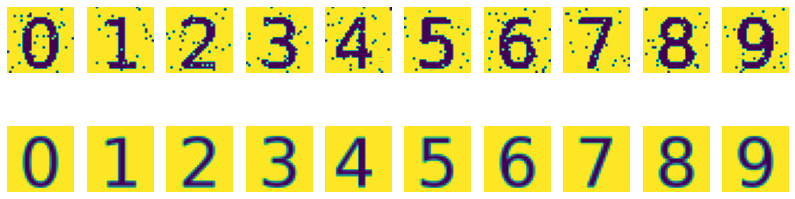

In [12]:
# мало зашумлённые
make_test(test[3],figsize=(14,4))

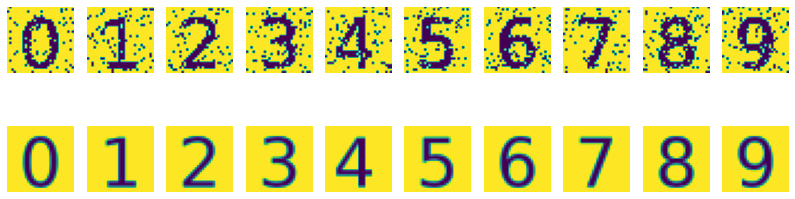

In [13]:
# средне зашумлённые
make_test(test[2],figsize=(14,4))

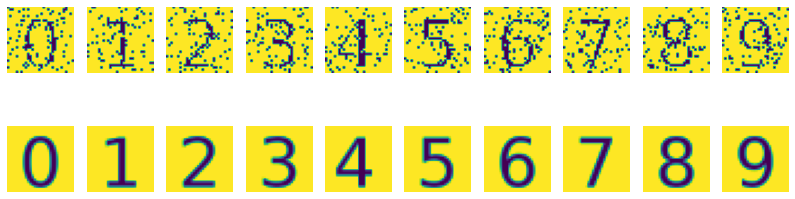

In [14]:
# сильно зашумлённые
make_test(test[0],figsize=(14,4))

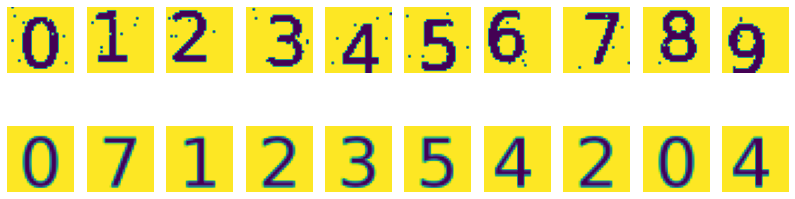

In [15]:
# искажение сдвигом
make_test(test[1],figsize=(14,4))